# This is a sample Jupyter Notebook

Below is an example of a code cell.
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#loading the data set
salary_data =pd.read_csv('./data/salary_Data.csv')
salary_data.head()

salary_data.info()


ModuleNotFoundError: No module named 'numpy'

<Axes: xlabel='YearsExperience', ylabel='Count'>

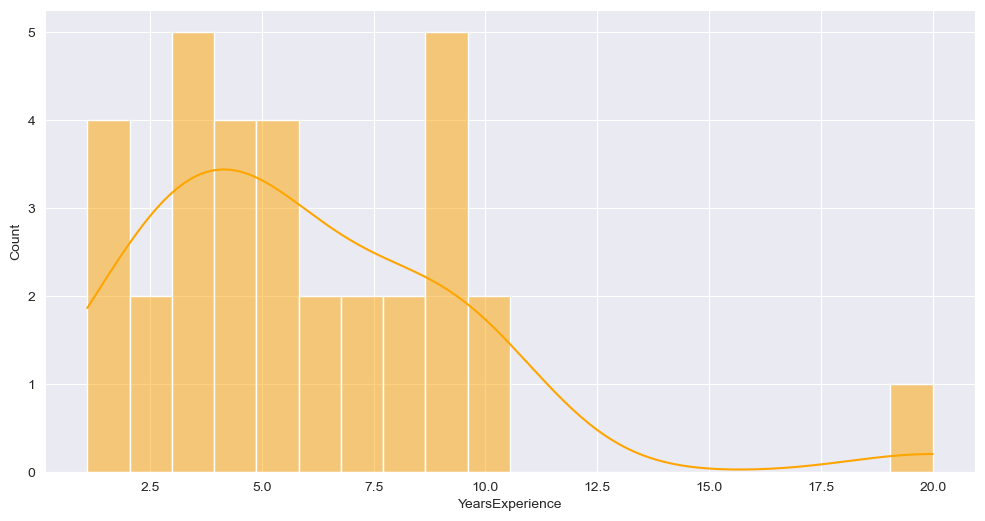

In [3]:
salary_data.describe()

salary_data.skew()

plt.figure(figsize=(12,6))
sns.histplot(x=salary_data['YearsExperience'], bins=20, kde=True, color='orange')



<Axes: ylabel='YearsExperience'>

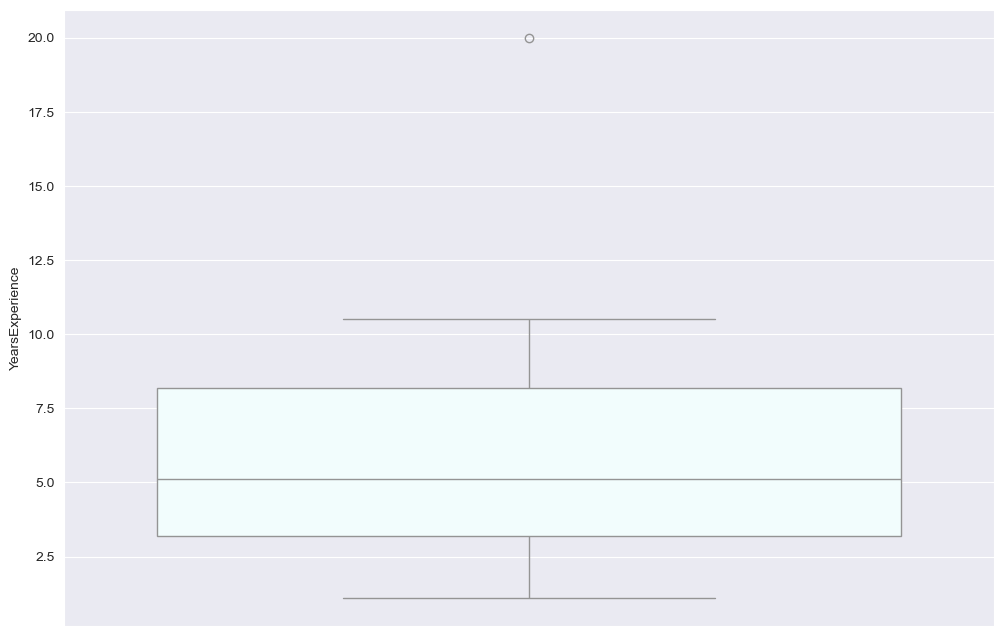

In [24]:

plt.figure(figsize=(12,8))
sns.boxplot(y=salary_data['YearsExperience'], color='azure')

<Axes: ylabel='Salary'>

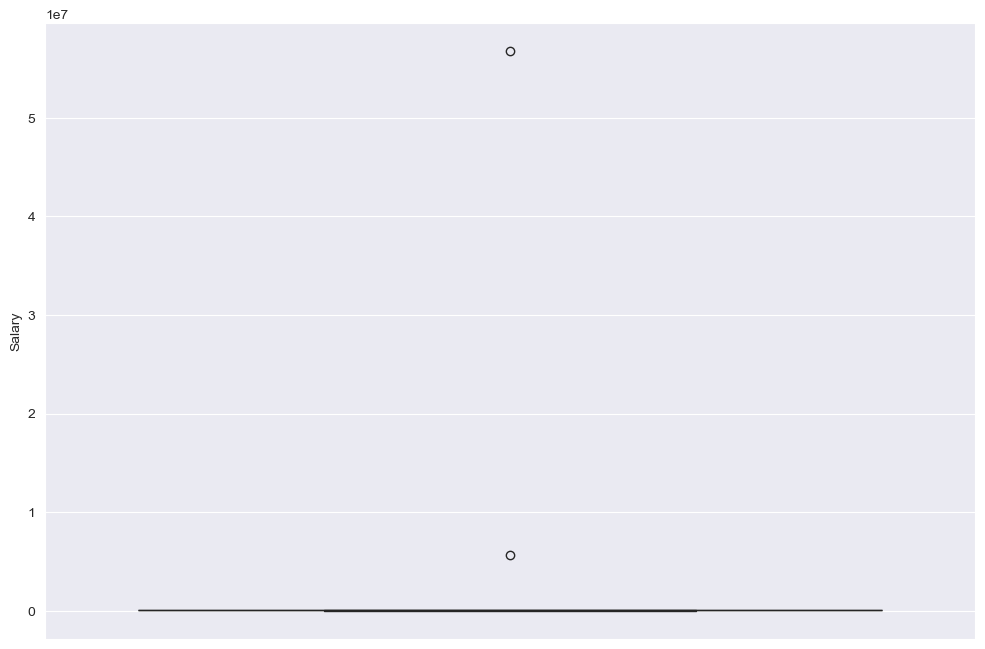

In [4]:
plt.figure(figsize=(12,8))
sns.boxplot(y=salary_data['Salary'], color='maroon')


In [9]:
Q1 = salary_data.quantile(0.25, axis=0)
print('First_quantile :', Q1)

First_quantile : YearsExperience        3.2
Salary             57081.0
Name: 0.25, dtype: float64


In [10]:
Q3 = salary_data.quantile(0.75, axis=0)
print('Third_quantile :', Q3)

Third_quantile : YearsExperience         8.2
Salary             109431.0
Name: 0.75, dtype: float64


In [13]:
IQR = Q3 - Q1
print('Inter Quartile Range :', IQR)

quants = salary_data.quantile([0.25, 0.5, 0.75])
print('Quantile [0.25, 0.5, 0.75] :\n', quants)


Inter Quartile Range : YearsExperience        5.0
Salary             52350.0
dtype: float64
Quantile [0.25, 0.5, 0.75] :
       YearsExperience    Salary
0.25              3.2   57081.0
0.50              5.1   81363.0
0.75              8.2  109431.0


In [15]:
w = 1.01
min = Q1 - w * IQR
max = Q3 + 1.5 * IQR
salary_data_outliers = salary_data[((salary_data < min) | (salary_data > max)).any(axis=1)]
salary_data_outliers

,YearsExperience,Salary
5,2.9,56777642.0
12,4.0,5695700.0
32,20.0,1000.0


In [16]:
salary_data = salary_data[~((salary_data < (Q1 - w * IQR)) | (salary_data > (Q3 + w * IQR))).any(axis=1)]
salary_data.shape

(30, 2)

In [17]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [21]:
mean_salary = salary_data["Salary"].mean()
mean_salary

np.float64(79216.33333333333)

In [24]:
salary_data.fillna({"Salary": mean_salary}, inplace=True)
#salary_data.isnull().sum()

In [26]:
x = salary_data['YearsExperience']
y = salary_data['Salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((21,), (9,), (21,), (9,))

In [27]:
x_train = x_train.to_numpy()
x_train = x_train.reshape(-1, 1)
x_test = x_test.to_numpy()
x_test = x_test.reshape(-1, 1)

y_train = y_train.to_numpy()
y_train = y_train.reshape(-1, 1)
y_test = y_test.to_numpy()
y_test = y_test.reshape(-1, 1)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((21, 1), (21, 1), (9, 1), (9, 1))

In [40]:
lr = LinearRegression()
lrModel = lr.fit(x_train, y_train)
lrModel.coef_, lrModel.intercept_

(array([[9551.1261315]]), array([26823.19366643]))

In [48]:
y_pred = lrModel.predict(x_test)
y_pred[:3]

array([[118514.00452885],
       [ 77444.16216339],
       [109917.9910105 ]])

In [49]:
lrModel.score(x_test, y_test)

0.9530221930508659

In [50]:
lrModel.score(x_train, y_train)

0.9281379237436905